# (sFigure20_part2)-Using CellphoneDB to Predict Cell-Cell Interactions Based on Ligand-Receptor Interactions.

In [212]:
import omicverse as ov
import scanpy as sc
import os
import matplotlib.pyplot as plt

In [213]:
ov.utils.ov_plot_set()

All dependencies are satisfied.


In [3]:
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'C6.CD8.FOS+IL7R+.T-early_response',
    'CD8.FOS+JUN+.T-early_response':'C5.CD8.FOS+JUN+.T-early_response',
    'CD8.GZMK+.Tem':'C3.CD8.GZMK+.Tem',
    'CD8.GZMK+.Tn':'C1.CD8.GZMK+.Tn',
    'CD8.GZMK+.early_Tem':'C2.CD8.GZMK+.early_Tem',
    'CD8.ISG+.T':'C7.CD8.ISG+.T',
    'CD8.KLRD1+TYROBP+.NK-like':'C11.CD8.KLRD1+TYROBP+.NK-like',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'C9.CD8.ZNF683+CXCR6+.Trm',
    'CD8.ZNF683+CXCR6-.Trm':'C10.CD8.ZNF683+CXCR6-.Trm',
    'CD8.ZNF683-CXCR6+.Trm':'C12.CD8.ZNF683-CXCR6+.Trm',
}
adata_CD8.obs['Subcelltype_ID_type']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

type_color_rna={
    'CD4.CAPG+.Tm':'C3.CD4.CAPG+.Tm',
    'CD4.CAPG+CREM-.Tm':'C4.CD4.CAPG+CREM-.Tm',
    'CD4.ADSL+.Tn':'C6.CD4.ADSL+.Tn',
    'CD4.IL21+.Tfh':'C7.CD4.IL21+.Tfh',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'C2.CD4.TNF+.T',
    'CD4.TNFRSF9+.Treg':'C11.CD4.TNFRSF9+.Treg',
    'CD4.TOX2+.Tfh':'C8.CD4.TOX2+.Tfh',
    'CD4.Tn':'C1.CD4.Tn',
    'CD4.TMP1+.Tm':'C5.CD4.TMP1+.Tm',
}
adata_CD4.obs['Subcelltype_ID_type']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD4,adata_CD8

(AnnData object with n_obs × n_vars = 6816 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 AnnData object with n_obs × n_vars = 6184 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden'

In [159]:
import anndata as ad
adata_CD4.uns['Subcelltype_ID_type_colors'] = adata_CD4.uns['Subcelltype_colors']
adata_CD8.uns['Subcelltype_ID_type_colors'] = adata_CD8.uns['Subcelltype_colors']
#adata_T = ad.concat([adata_CD4,adata_CD8])
adata = ad.concat([adata_CD4,adata_CD8])
adata

AnnData object with n_obs × n_vars = 13000 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'

In [5]:
adata_Epi=sc.read_h5ad('Gastric/Data/Epi_anno.h5ad')
adata_Epi.obs['Subcelltype_ID_type'] = adata_Epi.obs['Epi_celltype']
adata_Epi.uns['Subcelltype_ID_type_colors'] = [ov.pl.blue_color[2],ov.pl.blue_color[3],ov.pl.red_color[4],ov.pl.blue_color[5],
                                  ov.pl.red_color[0],ov.pl.red_color[2],ov.pl.red_color[1]]
print(adata_Epi.obs['Subcelltype_ID_type'].cat.categories),


Index(['PMC', 'PC', 'IM_PC', 'PG', 'IM_PG', 'IM_Enterocytes', 'IM_Goblet'], dtype='object')


(None,)

computing neighbors


2024-08-17 14:16:58.878589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-17 14:17:02.832287: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-17 14:17:22.632865: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:14)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
computing score 'Lipometabolism pathway'
    finished: added
    'Lipometabolism pathway', score of gene set (adata.obs).
    150 total control genes are used. (0:00:00)


[<AxesSubplot: title={'center': 'Lipometabolism pathway'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'Sample'}, xlabel='X_umap1', ylabel='X_umap2'>]

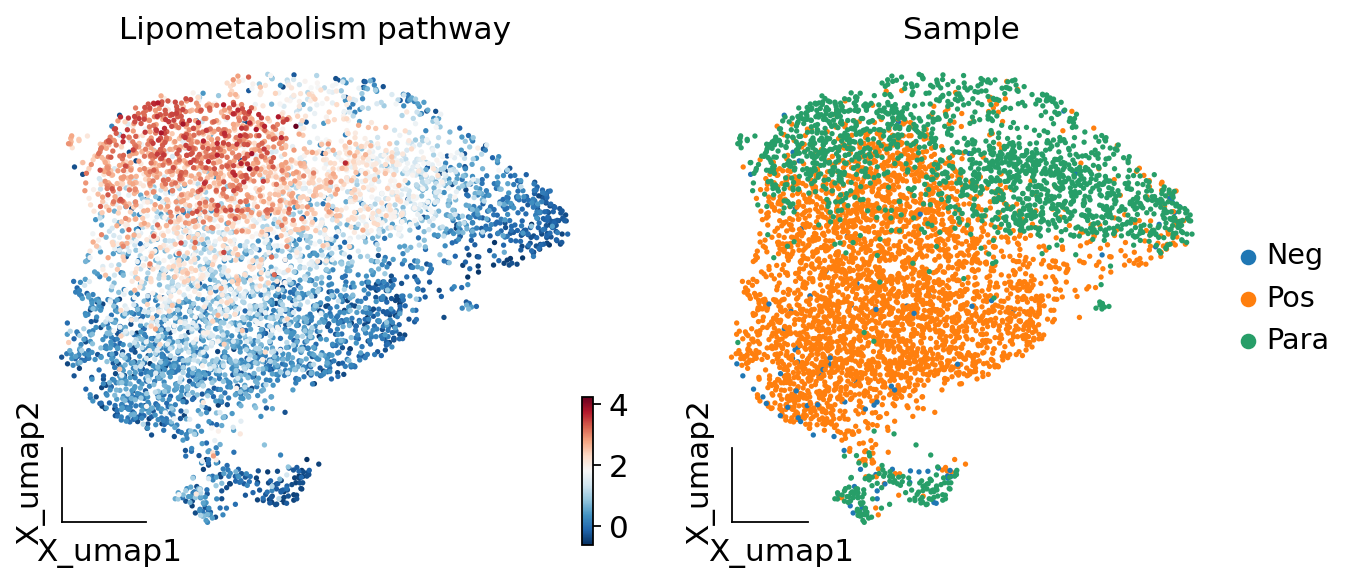

In [6]:
adata_Enterocytes = adata_Epi[adata_Epi.obs['Epi_celltype'].isin(['IM_Enterocytes'])].copy()

sc.pp.neighbors(adata_Enterocytes, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
#sc.tl.leiden(Epi,resolution=1)
sc.tl.paga(adata_Enterocytes)
sc.pl.paga(adata_Enterocytes, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_Enterocytes,init_pos='paga')


pathway_dict=ov.utils.geneset_prepare('GBM/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
select_gene =  pathway_dict['regulation of intestinal lipid absorption (GO:1904729)']
sc.tl.score_genes(adata_Enterocytes, select_gene, score_name='Lipometabolism pathway')
ov.pl.embedding(adata_Enterocytes,
                basis='X_umap',
                color=['Lipometabolism pathway','Sample',],
                frameon='small',cmap='RdBu_r',
                show=False,)

In [7]:
adata_Enterocytes.obs['Lipometabolism_type'] = 'Enterocytes\n(Normal)'
adata_Enterocytes.obs.loc[adata_Enterocytes.obs['Lipometabolism pathway']>2,'Lipometabolism_type']='Enterocytes\n(lipometabolism)'

In [8]:
print(adata_Epi.obs['Subcelltype_ID_type'].cat.categories),
adata_Epi.obs['Subcelltype_ID_type'] = adata_Epi.obs['Subcelltype_ID_type'].cat.remove_categories(['IM_Enterocytes'])
adata_Epi.obs['Subcelltype_ID_type'] = adata_Epi.obs['Subcelltype_ID_type'].cat.add_categories(['Enterocytes\n(lipometabolism)','Enterocytes\n(Normal)'])
print(adata_Epi.obs['Subcelltype_ID_type'].cat.categories)


Index(['PMC', 'PC', 'IM_PC', 'PG', 'IM_PG', 'IM_Enterocytes', 'IM_Goblet'], dtype='object')
Index(['PMC', 'PC', 'IM_PC', 'PG', 'IM_PG', 'IM_Goblet',
       'Enterocytes\n(lipometabolism)', 'Enterocytes\n(Normal)'],
      dtype='object')


In [9]:
adata_Epi.obs.loc[adata_Enterocytes.obs_names,'Subcelltype_ID_type'] = adata_Enterocytes.obs['Lipometabolism_type']
adata_Epi.obs['Subcelltype_ID_type']

AAACCTGAGACCTAGG-1_0                                PC
AAACCTGAGACGCACA-1_0             Enterocytes\n(Normal)
AAACCTGAGCTCCTCT-1_0                                PC
AAACCTGAGGCTCAGA-1_0                               PMC
AAACCTGCACTTAAGC-1_0                               PMC
                                     ...              
TTTGTCAAGGTGCAAC-1_11                               PC
TTTGTCAAGGTGCACA-1_11            Enterocytes\n(Normal)
TTTGTCACAAGAGGCT-1_11    Enterocytes\n(lipometabolism)
TTTGTCATCGGCGGTT-1_11            Enterocytes\n(Normal)
TTTGTCATCTCGATGA-1_11    Enterocytes\n(lipometabolism)
Name: Subcelltype_ID_type, Length: 26265, dtype: category
Categories (8, object): ['PMC' < 'PC' < 'IM_PC' < 'PG' < 'IM_PG' < 'IM_Goblet' < 'Enterocytes\n(lipometabolism)' < 'Enterocytes\n(Normal)']

# Ro/e calculation and visualization

In [160]:
adata = ad.concat([adata,adata_Epi])
adata

AnnData object with n_obs × n_vars = 39265 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Subcelltype_ID_type'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'

In [161]:
adata = adata.raw.to_adata()
adata.write_h5ad('Gastric/Scripts_For_Github/data/phone/adata_norm_log.h5ad',compression='gzip')
adata.obs['cell_type'] = adata.obs['Sample'].astype(str) + '.' + adata.obs['Subcelltype_ID_type'].astype(str)

In [13]:
import pandas as pd
#meta导出
df_meta = pd.DataFrame(data={'Cell':list(adata.obs.index),
                             'cell_type':[ i for i in adata.obs['cell_type']]
                            })
df_meta.set_index('Cell', inplace=True)
df_meta.to_csv('Gastric/Scripts_For_Github/data/phone/meta.tsv', sep = '\t')

In [14]:
df_meta

,cell_type
Cell,
AAACCTGGTACACCGC-1_0,Pos.C5.CD4.TMP1+.Tm
AAACGGGGTACAGCAG-1_0,Pos.C2.CD4.TNF+.T
AAAGCAATCGAACTGT-1_0,Pos.C5.CD4.TMP1+.Tm
AAAGTAGGTACATCCA-1_0,Pos.C5.CD4.TMP1+.Tm
AACCATGAGAAGGACA-1_0,Pos.C4.CD4.CAPG+CREM-.Tm
...,...
TTTGTCAAGGTGCAAC-1_11,Para.PC
TTTGTCAAGGTGCACA-1_11,Para.Enterocytes\n(Normal)
TTTGTCACAAGAGGCT-1_11,Para.Enterocytes\n(lipometabolism)


In [15]:
cpdb_file_path = 'Gastric/Reference/cellphonedb-data/cellphonedb.zip'
meta_file_path = os.getcwd()+'/data/phone/meta.tsv'
counts_file_path = os.getcwd()+'/data/phone/adata_norm_log.h5ad'
microenvs_file_path = None
out_path =os.getcwd()+'/data/phone/adata_cellphone/'

In [16]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellPhoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix.
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    microenvs_file_path = microenvs_file_path,       # optional (default: None): defines cells per microenvironment.
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                   # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 4,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

Reading user files...
The following user files were loaded successfully:
/storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_norm_log.h5ad
/storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/meta.tsv
[ ][CORE][17/08/24-14:18:35][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:4 Precision:3
[ ][CORE][17/08/24-14:18:35][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][17/08/24-14:18:37][INFO] Running Real Analysis
[ ][CORE][17/08/24-14:18:38][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [05:39<00:00,  2.95it/s]

[ ][CORE][17/08/24-14:24:18][INFO] Building Pvalues result


[ ][CORE][17/08/24-14:24:38][INFO] Building results
Saved deconvoluted to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_deconvoluted_08_17_2024_142442.txt
Saved deconvoluted_percents to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_deconvoluted_percents_08_17_2024_142442.txt
Saved means to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_means_08_17_2024_142442.txt
Saved pvalues to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_pvalues_08_17_2024_142442.txt
Saved significant_means to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_significant_means_08_17_2024_142442.txt


In [17]:
deconvoluted = cpdb_results['deconvoluted']
means = cpdb_results['means']
pvalues = cpdb_results['pvalues']
significant_means = cpdb_results['significant_means']

In [18]:
interaction=ov.single.cpdb_network_cal(adata = adata,
        pvals = cpdb_results['pvalues'],
        celltype_key = "Subcelltype_ID_type",)   
interaction

ktplotspy have been install version: 0.2.1


{'count_network':                                Neg.C1.CD4.Tn  Neg.C1.CD8.GZMK+.Tn  \
 Neg.C1.CD4.Tn                             28                   28   
 Neg.C1.CD8.GZMK+.Tn                       26                   31   
 Neg.C10.CD4.LAG3+.Treg                    22                   24   
 Neg.C10.CD8.ZNF683+CXCR6-.Trm             32                   33   
 Neg.C11.CD4.TNFRSF9+.Treg                 21                   23   
 ...                                      ...                  ...   
 Pos.IM_PC                                 20                   20   
 Pos.IM_PG                                  7                    3   
 Pos.PC                                    19                   16   
 Pos.PG                                    16                   15   
 Pos.PMC                                   13                   10   
 
                                Neg.C10.CD4.LAG3+.Treg  \
 Neg.C1.CD4.Tn                                      25   
 Neg.C1.CD8.GZMK+.Tn     

# celltype specific interaction 

In [162]:
import pandas as pd
#meta导出
df_meta = pd.DataFrame(data={'Cell':list(adata.obs.index),
                             'cell_type':[ i for i in adata.obs['Subcelltype_ID_type']]
                            })
df_meta.set_index('Cell', inplace=True)
df_meta.to_csv('Gastric/Scripts_For_Github/data/phone/meta.tsv', sep = '\t')

In [163]:
cpdb_file_path = 'Gastric/Reference/cellphonedb-data/cellphonedb.zip'
meta_file_path = os.getcwd()+'/data/phone/meta.tsv'
counts_file_path = os.getcwd()+'/data/phone/adata_norm_log.h5ad'
microenvs_file_path = None
out_path =os.getcwd()+'/data/phone/adata_cellphone/'

In [164]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellPhoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix.
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    microenvs_file_path = microenvs_file_path,       # optional (default: None): defines cells per microenvironment.
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                   # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 4,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

Reading user files...
The following user files were loaded successfully:
/storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_norm_log.h5ad
/storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/meta.tsv
[ ][CORE][17/08/24-23:13:54][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:4 Precision:3
[ ][CORE][17/08/24-23:13:54][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][17/08/24-23:13:56][INFO] Running Real Analysis
[ ][CORE][17/08/24-23:13:56][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [04:34<00:00,  3.65it/s]

[ ][CORE][17/08/24-23:18:30][INFO] Building Pvalues result


[ ][CORE][17/08/24-23:18:32][INFO] Building results
Saved deconvoluted to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_deconvoluted_08_17_2024_231833.txt
Saved deconvoluted_percents to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_deconvoluted_percents_08_17_2024_231833.txt
Saved means to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_means_08_17_2024_231833.txt
Saved pvalues to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_pvalues_08_17_2024_231833.txt
Saved significant_means to /storage/zengjianyangLab/hulei/Gastric/Scripts_For_Github/data/phone/adata_cellphone/statistical_analysis_significant_means_08_17_2024_231833.txt


In [167]:
interaction=ov.single.cpdb_network_cal(adata = adata,
        pvals = cpdb_results['pvalues'],
        celltype_key = "cell_labels",)   

ktplotspy have been install version: 0.2.1


Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Inferred max_s (max size of scatter point) is: 88.68113535786188
Plotting legends..
Estimated legend width: 26.62764444444445 mm


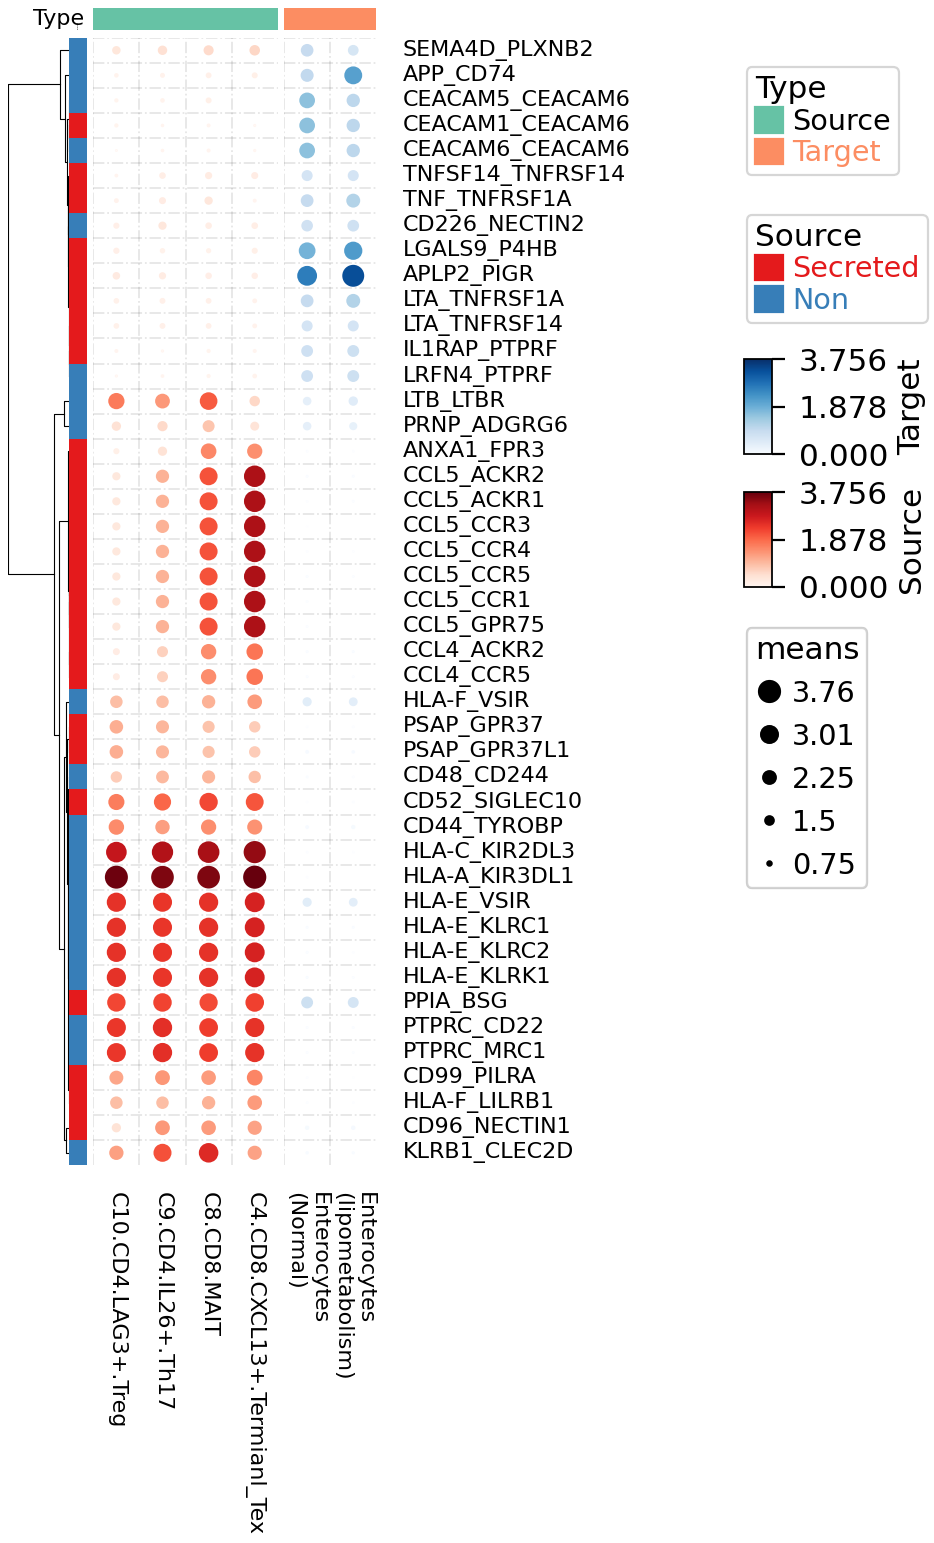

In [234]:
adata.obs['cell_labels'] = adata.obs['Subcelltype_ID_type']
ov.pl.cpdb_group_heatmap(adata=adata,
                         celltype_key='Subcelltype_ID_type',
                            means=cpdb_results['means'],
                            cmap={'Target':'Blues','Source':'Reds'},
                            source_cells=['C10.CD4.LAG3+.Treg','C9.CD4.IL26+.Th17','C8.CD8.MAIT','C4.CD8.CXCL13+.Termianl_Tex'],
                            target_cells=['Enterocytes\n(Normal)','Enterocytes\n(lipometabolism)'],
                            plot_secret=True,
                            min_means=3,
                            nodecolor_dict=None,
                            ax=None,
                            figsize=(3,8),
                            fontsize=10,)
#fig.savefig('Gastric/Figure/sFigure20/sFigure20_B.png', dpi=300,bbox_inches = 'tight')

In [171]:
adata_Tcell = ad.concat([adata_CD4,adata_CD8])
Exhausted_Tcell = adata_Tcell[adata_Tcell.obs['Subcelltype_ID_type'].isin([
    'C10.CD4.LAG3+.Treg','C9.CD4.IL26+.Th17','C8.CD8.MAIT','C4.CD8.CXCL13+.Termianl_Tex'])]
Exhausted_Tcell

View of AnnData object with n_obs × n_vars = 1379 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'

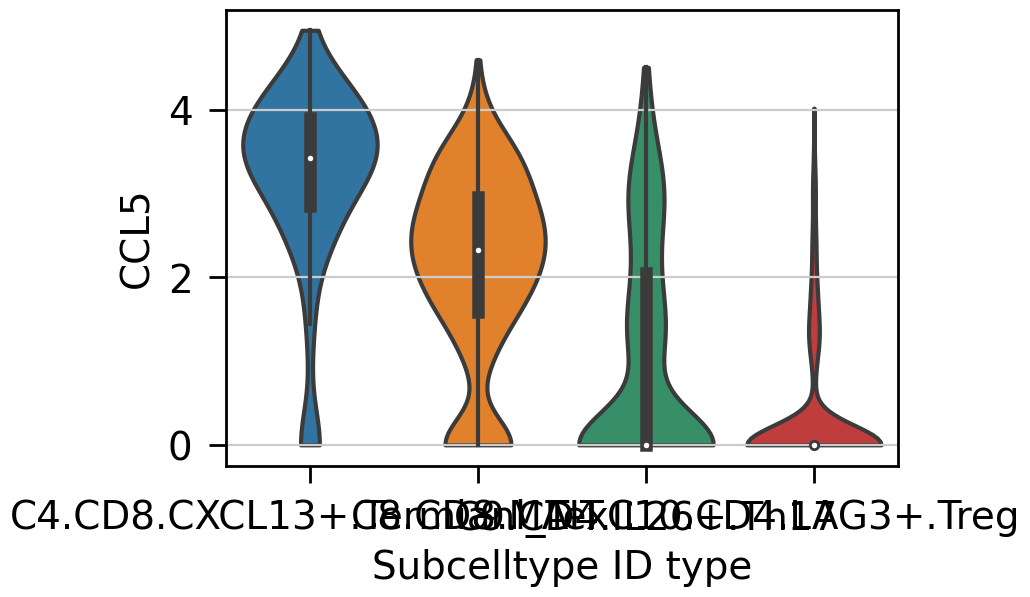

In [174]:
from matplotlib.pyplot import rc_context

with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(
        Exhausted_Tcell,
        ["CCL5"],
        groupby="Subcelltype_ID_type",
        stripplot=False,  # remove the internal dots
        inner="box",  # adds a boxplot inside violins
    )

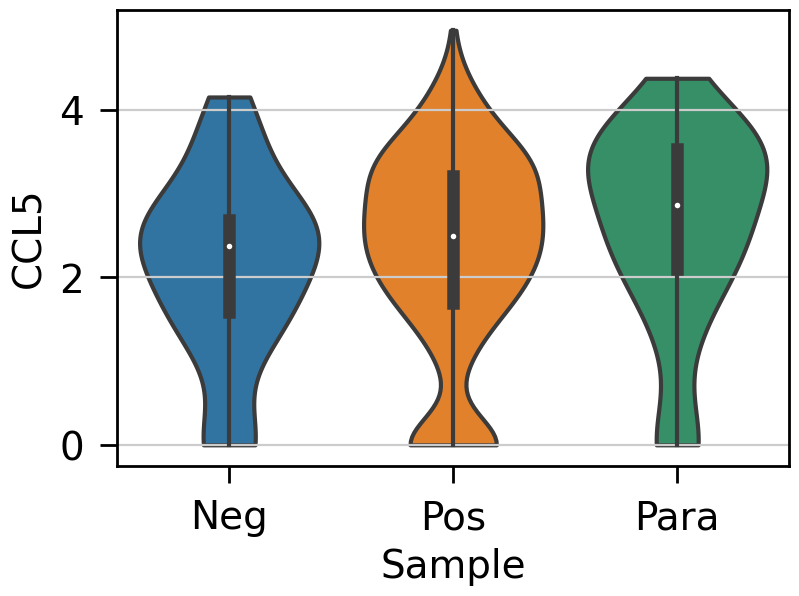

In [187]:
from matplotlib.pyplot import rc_context

with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(
        Exhausted_Tcell[Exhausted_Tcell.obs['Subcelltype_ID_type'].isin(['C8.CD8.MAIT','C4.CD8.CXCL13+.Termianl_Tex'])],
        ["CCL5"],
        groupby="Sample",scale='width',
        stripplot=False,  # remove the internal dots
        inner="box",  # adds a boxplot inside violins
    )

<AxesSubplot: >

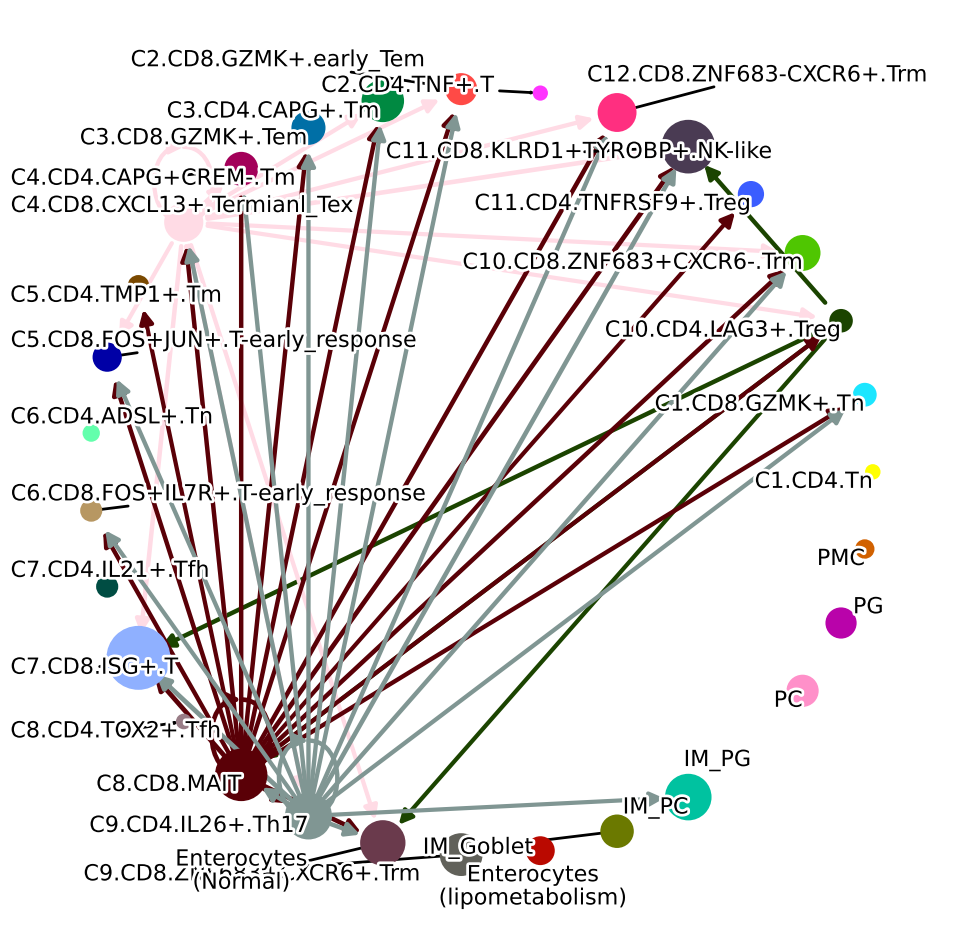

In [200]:
fig, ax = plt.subplots(figsize=(6,6)) 
ov.pl.cpdb_network(adata,interaction['interaction_edges'],celltype_key='cell_labels',
            counts_min=30,
            nodesize_scale=5,fontsize=8,
            source_cells=['C10.CD4.LAG3+.Treg','C9.CD4.IL26+.Th17','C8.CD8.MAIT','C4.CD8.CXCL13+.Termianl_Tex'],
            ax=ax)

In [ ]:
interaction=ov.single.cpdb_network_cal(adata = adata,
        pvals = pvalues,
        celltype_key = "Subcelltype_ID_type",)   

In [222]:
sub_i = interaction['interaction_edges']
sub_i=sub_i.loc[sub_i['SOURCE'].isin(['C10.CD4.LAG3+.Treg','C9.CD4.IL26+.T17','C8.CD8.MAIT','C4.CD8.CXCL13+.Termianl_Tex',])]
sub_i=sub_i.loc[sub_i['TARGET'].isin(['Enterocytes\n(Normal)','Enterocytes\n(lipometabolism)','PMC','IM_Goblet',
 'IM_PC',
 'IM_PG',
 'PC',
 'PG',
])] #突出标明某些亚型
adata_used = adata[adata.obs['Subcelltype_ID_type'].isin(['C10.CD4.LAG3+.Treg','C9.CD4.IL26+.T17',
                                                          'C8.CD8.MAIT','C4.CD8.CXCL13+.Termianl_Tex','Enterocytes\n(Normal)',
                                                          'Enterocytes\n(lipometabolism)','PMC','IM_Goblet',
 'IM_PC',
 'IM_PG',
 'PC',
 'PG',])]
adata_used

View of AnnData object with n_obs × n_vars = 27295 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'Subcelltype_ID_type', 'cell_type', 'cell_labels'
    obsm: 'X_pca', 'X_scVI', 'X_umap'

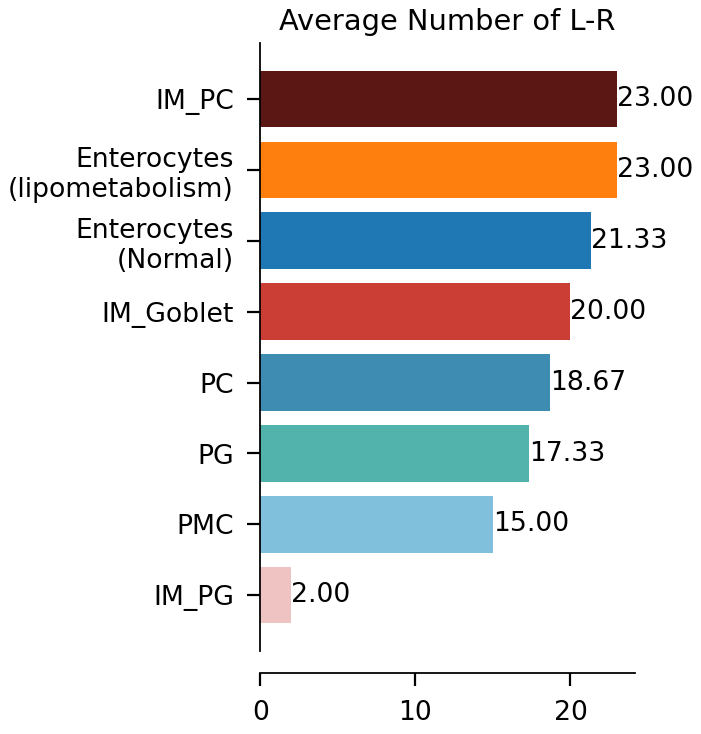

In [226]:
count_dict=dict(zip(sub_i.groupby(['TARGET',]).agg({'COUNT': 'mean'}).sort_values('COUNT').index.tolist(),
                   sub_i.groupby(['TARGET',]).agg({'COUNT': 'mean'}).sort_values('COUNT')['COUNT'].tolist()))
color_dict=['#F0C3C3',#tcr
            '#81C0DD', #pre
            '#52B3AD',#rsc
            '#3E8CB1', #middle
            '#CB3E35', #tumor
            '#1f77b4',#rod
            '#ff7f0e', #pp
            '#5A1713', #cpc
           ]
fig, ax = plt.subplots(figsize=(3,5))
ax.barh(y=list(count_dict.keys()),
     width=list(count_dict.values()),
      color=color_dict
       )
for idx,i in enumerate(list(count_dict.keys())):
    ax.text(count_dict[i],idx,'{:.2f}'.format(count_dict[i]),
            fontsize=12,verticalalignment='center')
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_position(('outward', 0))
ax.spines['bottom'].set_position(('outward', 10))

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Average Number of L-R',fontsize=13)
fig.savefig('Gastric/Figure/sFigure20/sFigure20_B.png', dpi=300,bbox_inches = 'tight')

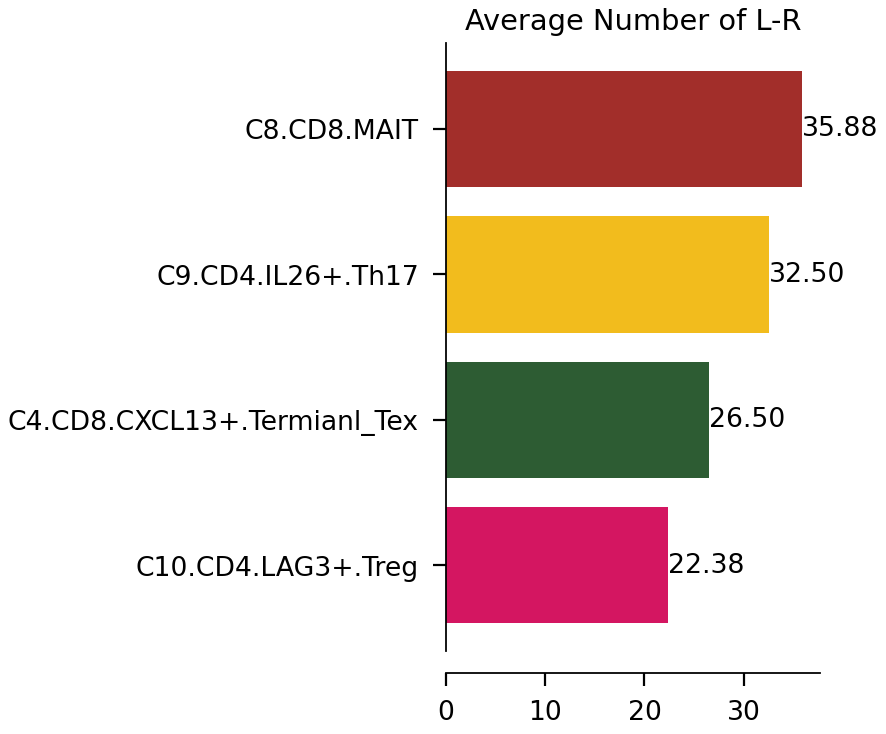

In [228]:
count_dict=dict(zip(sub_i.groupby(['TARGET',]).agg({'COUNT': 'mean'}).sort_values('COUNT').index.tolist(),
                   sub_i.groupby(['TARGET',]).agg({'COUNT': 'mean'}).sort_values('COUNT')['COUNT'].tolist()))
color_dict=['#D41661',#tcr
            '#2D5C33', #pre
            '#F2BC1D',#rsc
            '#A22E2A', #middle
           ]
fig, ax = plt.subplots(figsize=(3,5))
ax.barh(y=list(count_dict.keys()),
     width=list(count_dict.values()),
      color=color_dict
       )
for idx,i in enumerate(list(count_dict.keys())):
    ax.text(count_dict[i],idx,'{:.2f}'.format(count_dict[i]),
            fontsize=12,verticalalignment='center')
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_position(('outward', 0))
ax.spines['bottom'].set_position(('outward', 10))

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Average Number of L-R',fontsize=13)
fig.savefig('Gastric/Figure/sFigure20/sFigure20_C.png', dpi=300,bbox_inches = 'tight')